In [5]:
import numpy as np
import nibabel as nib
from matplotlib.pyplot import subplots, tight_layout
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assignment

In this assigment, we ask you to use the same set of images as in the work through example. However, instead of GMM, we want you to try a different clustering method called __KMeans__. The documentation for KMneans is available here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Some examples of how kmeans clustering can go wrong are shown in [this example code](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py).


Using `KMeans` from 'sklearn.cluster', do the following tasks:

- Investigate different numbers of clusters, similarly to what we did in th work through example.
- Use different combinations of the 4 images to see how the clustering performs in different cases.
- The labelled results using all four images may not look as clean as the ones in the work-through example. Try scaling the images e.g. using the sklearn standard scaler, and combining the scaled images. Do the results change? If yes, explore and comment on why you think scaling may be advantageous in this clustering example.
- Compare the behaviour of `KMeans` to the outcome with `GaussianMixture`.


# Your Solution


In [7]:
img_3d = nib.load('data/t1.nii')
img1 = img_3d.get_fdata()

img_3d = nib.load('data/t1_contrast.nii')
img2 = img_3d.get_fdata()

img_3d = nib.load('data/flair.nii')
img3 = img_3d.get_fdata()

img_3d = nib.load('data/adc.nii')
img4 = img_3d.get_fdata()

In [13]:
mask = (img1>0) & (img2>0) & (img3>0) & (img4>0)

img1_nz = img1[mask]
img2_nz = img2[mask]
img3_nz = img3[mask]
img4_nz = img4[mask]

all_img = np.stack([img1_nz, img2_nz, img3_nz, img4_nz], axis=1)

In [18]:
RANDOM_SEED = 123
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED)
img1_kmeans_labels = kmeans.fit_predict(img1_nz.reshape(-1, 1))
img1_kmeans_labels += 1
img1_kmeans_labels_mapped = np.zeros(img1.shape)
img1_kmeans_labels_mapped[mask] = img1_kmeans_labels
img2_kmeans_labels = kmeans.fit_predict(img2_nz.reshape(-1, 1))

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
img2_kmeans_labels += 1
img2_kmeans_labels_mapped = np.zeros(img2.shape)
img2_kmeans_labels_mapped[mask] = img2_kmeans_labels

img3_kmeans_labels = kmeans.fit_predict(img3_nz.reshape(-1, 1))

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
img3_kmeans_labels += 1
img3_kmeans_labels_mapped = np.zeros(img3.shape)
img3_kmeans_labels_mapped[mask] = img3_kmeans_labels
img4_kmeans_labels = kmeans.fit_predict(img4_nz.reshape(-1, 1))

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
img4_kmeans_labels += 1
img4_kmeans_labels_mapped = np.zeros(img4.shape)
img4_kmeans_labels_mapped[mask] = img4_kmeans_labels
all_img_kmeans_labels = kmeans.fit_predict(all_img)

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
all_img_kmeans_labels += 1
all_img_kmeans_labels_mapped = np.zeros(img1.shape)
all_img_kmeans_labels_mapped[mask] = all_img_kmeans_labels

NameError: name 'show' is not defined

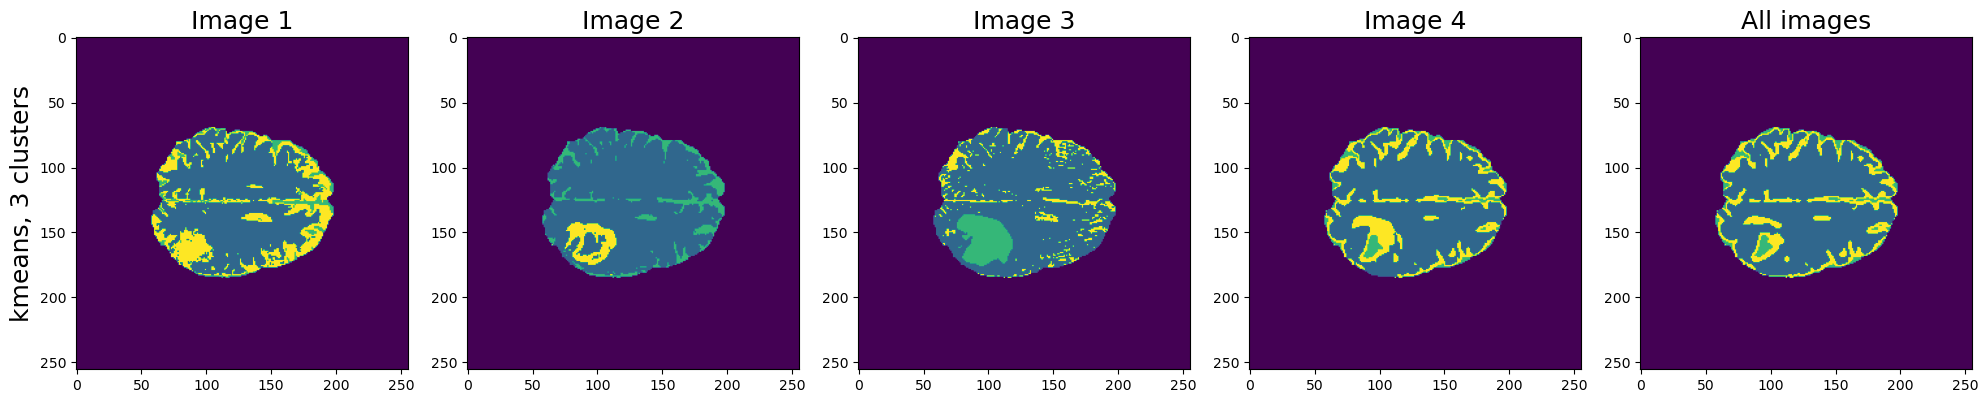

In [24]:
img_slice = 20

fig, ax = subplots(1, 5, figsize=(20, 5))

ax[0].imshow(img1_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[1].imshow(img2_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[2].imshow(img3_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[3].imshow(img4_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[4].imshow(all_img_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[0].set_ylabel("kmeans, 3 clusters", fontsize=18)
ax[0].set_title("Image 1", fontsize=18)
ax[1].set_title("Image 2", fontsize=18)
ax[2].set_title("Image 3", fontsize=18)
ax[3].set_title("Image 4", fontsize=18)
ax[4].set_title("All images", fontsize=18)
tight_layout();

In [ ]:
fig, ax = subplots(4, 4, figsize=(20, 20))

ax[0, 0].hist(img1_nz, bins=50);
ax[0, 0].set_title('Image 1', fontsize=16)
ax[0, 1].scatter(img1_nz, img2_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[0, 1].set_xlabel('Image 1', fontsize=16)
ax[0, 1].set_ylabel('Image 2', fontsize=16)
ax[0, 2].scatter(img1_nz, img3_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[0, 2].set_xlabel('Image 1', fontsize=16)
ax[0, 2].set_ylabel('Image 3', fontsize=16)
ax[0, 3].scatter(img1_nz, img4_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[0, 3].set_xlabel('Image 1', fontsize=16)
ax[0, 3].set_ylabel('Image 4', fontsize=16)

ax[1, 0].scatter(img2_nz, img1_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[1, 0].set_xlabel('Image 2', fontsize=16)
ax[1, 0].set_ylabel('Image 1', fontsize=16)
ax[1, 1].hist(img2_nz, bins=50);
ax[1, 1].set_title('Image 2', fontsize=16)
ax[1, 2].scatter(img2_nz, img3_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[1, 2].set_xlabel('Image 2', fontsize=16)
ax[1, 2].set_ylabel('Image 3', fontsize=16)
ax[1, 3].scatter(img2_nz, img4_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[1, 3].set_xlabel('Image 2', fontsize=16)
ax[1, 3].set_ylabel('Image 4', fontsize=16)

ax[2, 0].scatter(img3_nz, img1_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[2, 0].set_xlabel('Image 3', fontsize=16)
ax[2, 0].set_ylabel('Image 1', fontsize=16)
ax[2, 1].scatter(img3_nz, img2_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[2, 1].set_xlabel('Image 3', fontsize=16)
ax[2, 1].set_ylabel('Image 2', fontsize=16)
ax[2, 2].hist(img3_nz, bins=50);
ax[2, 2].set_title('Image 3, fontsize=16')
ax[2, 3].scatter(img3_nz, img4_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[2, 3].set_xlabel('Image 3', fontsize=16)
ax[2, 3].set_ylabel('Image 4', fontsize=16)

ax[3, 0].scatter(img4_nz, img1_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[3, 0].set_xlabel('Image 4', fontsize=16)
ax[3, 0].set_ylabel('Image 1', fontsize=16)
ax[3, 1].scatter(img4_nz, img2_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[3, 1].set_xlabel('Image 4', fontsize=16)
ax[3, 1].set_ylabel('Image 2', fontsize=16)
ax[3, 2].scatter(img4_nz, img3_nz, c=all_img_kmeans_labels, cmap='viridis', vmin=0);
ax[3, 2].set_xlabel('Image 4', fontsize=16)
ax[3, 2].set_ylabel('Image 3', fontsize=16)
ax[3, 3].hist(img4_nz, bins=50);
ax[3, 3].set_title('Image 4', fontsize=16)

tight_layout();

In [28]:
scaler = StandardScaler()

img1_scaled = scaler.fit_transform(img1_nz.reshape(-1, 1))
img2_scaled = scaler.fit_transform(img2_nz.reshape(-1, 1))
img3_scaled = scaler.fit_transform(img3_nz.reshape(-1, 1))
img4_scaled = scaler.fit_transform(img4_nz.reshape(-1, 1))

all_img_scaled = np.concatenate([img1_scaled, img2_scaled, img3_scaled, img4_scaled], axis=1)

In [29]:
img1_kmeans_labels = kmeans.fit_predict(img1_scaled)

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
img1_kmeans_labels += 1
img1_kmeans_labels_mapped = np.zeros(img1.shape)
img1_kmeans_labels_mapped[mask] = img1_kmeans_labels

img2_kmeans_labels = kmeans.fit_predict(img2_scaled)

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
img2_kmeans_labels += 1
img2_kmeans_labels_mapped = np.zeros(img2.shape)
img2_kmeans_labels_mapped[mask] = img2_kmeans_labels

img3_kmeans_labels = kmeans.fit_predict(img3_scaled)

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
img3_kmeans_labels += 1
img3_kmeans_labels_mapped = np.zeros(img3.shape)
img3_kmeans_labels_mapped[mask] = img3_kmeans_labels

img4_kmeans_labels = kmeans.fit_predict(img4_scaled)

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
img4_kmeans_labels += 1
img4_kmeans_labels_mapped = np.zeros(img4.shape)
img4_kmeans_labels_mapped[mask] = img4_kmeans_labels

all_img_kmeans_labels = kmeans.fit_predict(all_img_scaled)

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
all_img_kmeans_labels += 1
all_img_kmeans_labels_mapped = np.zeros(img1.shape)
all_img_kmeans_labels_mapped[mask] = all_img_kmeans_labels

NameError: name 'show' is not defined

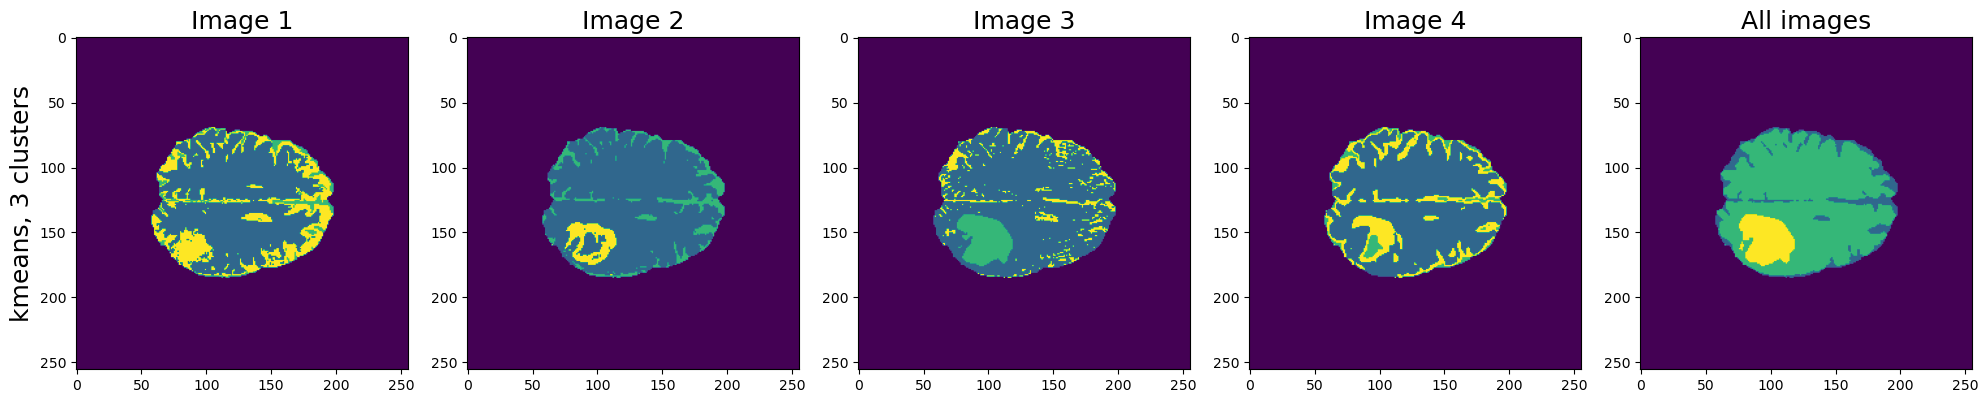

In [35]:
fig, ax = subplots(1, 5, figsize=(20, 5))

ax[0].imshow(img1_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[1].imshow(img2_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[2].imshow(img3_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[3].imshow(img4_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');
ax[4].imshow(all_img_kmeans_labels_mapped[:, :, img_slice], cmap='viridis');

ax[0].set_ylabel("kmeans, 3 clusters", fontsize=18)

ax[0].set_title("Image 1", fontsize=18)
ax[1].set_title("Image 2", fontsize=18)
ax[2].set_title("Image 3", fontsize=18)
ax[3].set_title("Image 4", fontsize=18)
ax[4].set_title("All images", fontsize=18)

tight_layout();
show()

NameError: name 'show' is not defined

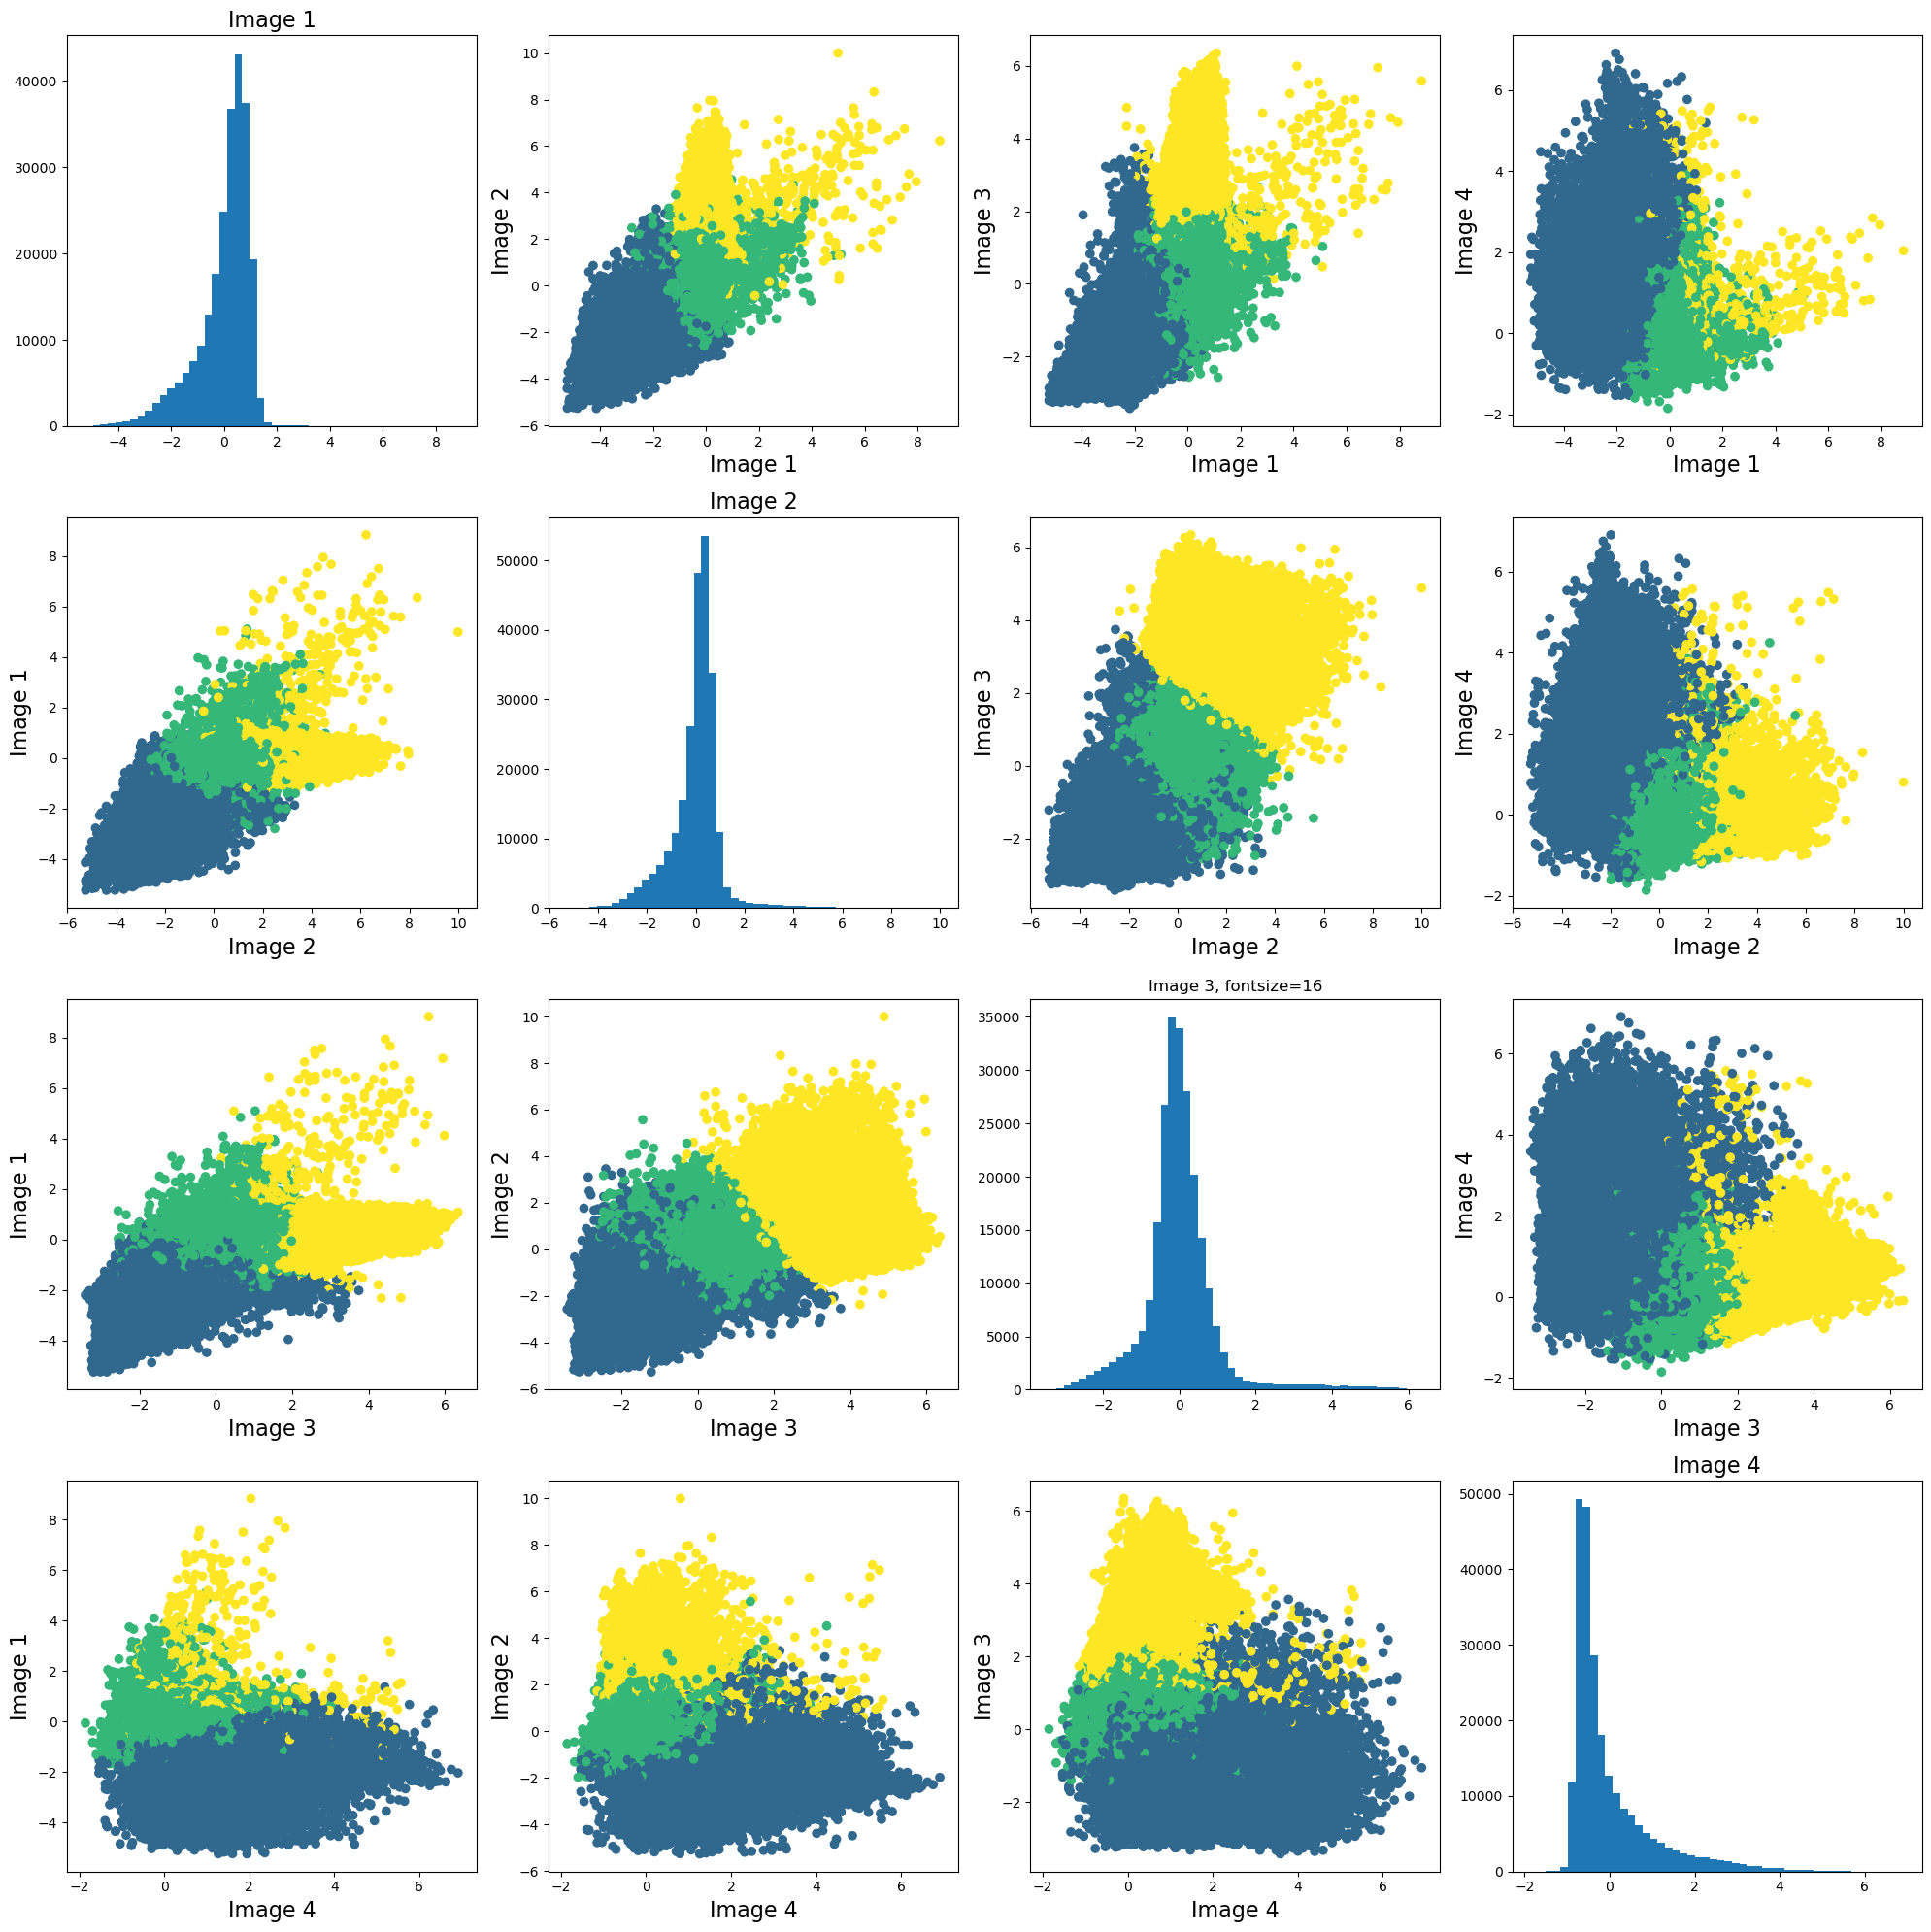

In [36]:
fig, ax = subplots(4, 4, figsize=(20, 20))

ax[0, 0].hist(img1_scaled, bins=50);
ax[0, 0].set_title('Image 1', fontsize=16)
ax[0, 1].scatter(img1_scaled, img2_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[0, 1].set_xlabel('Image 1', fontsize=16)
ax[0, 1].set_ylabel('Image 2', fontsize=16)
ax[0, 2].scatter(img1_scaled, img3_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[0, 2].set_xlabel('Image 1', fontsize=16)
ax[0, 2].set_ylabel('Image 3', fontsize=16)
ax[0, 3].scatter(img1_scaled, img4_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[0, 3].set_xlabel('Image 1', fontsize=16)
ax[0, 3].set_ylabel('Image 4', fontsize=16)

ax[1, 0].scatter(img2_scaled, img1_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[1, 0].set_xlabel('Image 2', fontsize=16)
ax[1, 0].set_ylabel('Image 1', fontsize=16)
ax[1, 1].hist(img2_scaled, bins=50);
ax[1, 1].set_title('Image 2', fontsize=16)
ax[1, 2].scatter(img2_scaled, img3_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[1, 2].set_xlabel('Image 2', fontsize=16)
ax[1, 2].set_ylabel('Image 3', fontsize=16)
ax[1, 3].scatter(img2_scaled, img4_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[1, 3].set_xlabel('Image 2', fontsize=16)
ax[1, 3].set_ylabel('Image 4', fontsize=16)

ax[2, 0].scatter(img3_scaled, img1_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[2, 0].set_xlabel('Image 3', fontsize=16)
ax[2, 0].set_ylabel('Image 1', fontsize=16)
ax[2, 1].scatter(img3_scaled, img2_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[2, 1].set_xlabel('Image 3', fontsize=16)
ax[2, 1].set_ylabel('Image 2', fontsize=16)
ax[2, 2].hist(img3_scaled, bins=50);
ax[2, 2].set_title('Image 3, fontsize=16')
ax[2, 3].scatter(img3_scaled, img4_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[2, 3].set_xlabel('Image 3', fontsize=16)
ax[2, 3].set_ylabel('Image 4', fontsize=16)

ax[3, 0].scatter(img4_scaled, img1_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[3, 0].set_xlabel('Image 4', fontsize=16)
ax[3, 0].set_ylabel('Image 1', fontsize=16)
ax[3, 1].scatter(img4_scaled, img2_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[3, 1].set_xlabel('Image 4', fontsize=16)
ax[3, 1].set_ylabel('Image 2', fontsize=16)
ax[3, 2].scatter(img4_scaled, img3_scaled, c=all_img_kmeans_labels.reshape(-1, 1), cmap='viridis', vmin=0);
ax[3, 2].set_xlabel('Image 4', fontsize=16)
ax[3, 2].set_ylabel('Image 3', fontsize=16)
ax[3, 3].hist(img4_scaled, bins=50);
ax[3, 3].set_title('Image 4', fontsize=16)

tight_layout();